# SampleGen [from PDF and Copula Data]
This script plot the copulas from a provided correlation matrix and it generates the synthetic data used ba the component SimComp for the Monte Carlo simulation analysis.

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import seaborn 
import openturns as ot
import openturns.viewer as viewer
from copulae import GaussianCopula

ot.Log.Show(ot.Log.NONE)

## Correlation Matrix (Input)

In [2]:
dim = 5
R = ot.CorrelationMatrix (dim)
R[0,1] = 0.958468
R[0,2] = 0.955151
R[0,3] = 0.923061
R[0,4] = 0.929419
R[1,2] = 0.925727
R[1,3] = 0.911453
R[1,4] = 0.974772
R[2,3] = 0.967778
R[2,4] = 0.888889
R[3,4] = 0.877746

## Number of Samples
Enter the number of samples for the synthetic data generation

In [3]:
size = 10000

## Generation of Synthetic Data
PDFs shall be specified in the following code.
The path and the file name shall be specified in the code below.

In [5]:
copula = ot.NormalCopula(R)
#samples = copula.getSample(size)
#df = pd.DataFrame.from_records(samples)
distribution = ot.ComposedDistribution([ot.WeibullMin(9.37251, 2.5463, -0.116207), 
                     ot.WeibullMax(17.2285, 5.56578, 23.8581), 
                     ot.WeibullMin(8.89613, 2.52253, 0.0251285), 
                     ot.TruncatedNormal(7.62826, 3.39656, -0.000196298, 20.9742),
                     ot.WeibullMin(8.78902, 2.5815, -0.00816791)], copula)
#distribution = ot.ComposedDistribution([X0,X1,X2], copula)
samples = distribution.getSample(size)
df = pd.DataFrame.from_records(samples, columns = ['W-01', 'W-02', 'W-03', 'W-04', 'W-05'])
df.to_csv(r"D:\temp1\OneDrive - ENGIE\Python scripts\ProbAnalysis\VersionCopula\Example\SampleData\WindSpeedSample2.csv")
print(df.describe())

               W-01          W-02          W-03          W-04          W-05
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       8.213465      7.959380      7.926746      7.744956      7.819157
std        3.549710      3.332021      3.389495      3.306996      3.280266
min        0.248669     -1.311631      0.287313      0.006503      0.243812
25%        5.587308      5.582346      5.452593      5.421330      5.427420
50%        7.993843      7.756978      7.754471      7.695371      7.646379
75%       10.559657     10.126897     10.155911      9.954657     10.049417
max       23.249292     21.079145     23.066603     20.430602     22.156869


## Pair Plot of PDF with Copula
The following code plots a matrix of diagrams with PDF in the diagonal and scatter plots on the other elements. The effect of copula is visible by looking at the shape of the scatter plots. Narrower the sahpe of the scatter plot, higher the dependency of the elements. A copy of the diagram can be saved, by removing the comment '#' to the line before plt.show(). Path and file name shall be specified.

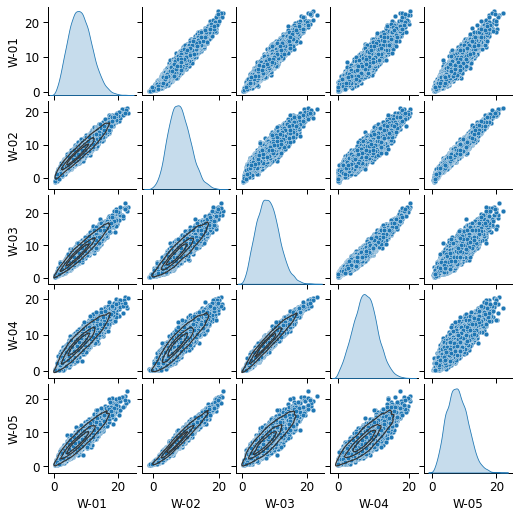

'\n_, ndim = df.shape\ng_cop = GaussianCopula(dim=ndim)  # initializing the copula\ng_cop.fit(df)  # fit the copula to the data\nprint(g_cop.params)\ncopula_out = copula.getCopula()\nprint(copula_out)\nh = seaborn.heatmap(df.corr(method="spearman"), vmin=0, vmax=1, square = True)\nh.fig.set_size_inches(3.5,3.5)\nh.savefig(\'D:\\IEEE\\MyArticles\\heat_copula.png\', format=\'png\', dpi=800)\nprint(df.corr(method="spearman"))\nplt.show()\n'

In [6]:
g = seaborn.pairplot(df, diag_kind="kde")
g.map_lower(seaborn.kdeplot, levels=4, color=".2")
g.fig.set_size_inches(7,7)
seaborn.set_context("paper", rc={
"font.size":12,"axes.titlesize":12,"axes.labelsize":12, "xtick.labelsize":12,"ytick.labelsize":12})
#g.savefig('D:\IEEE\MyArticles\copula.png', format='png', dpi=800)
plt.show()


## Print Correaltion Matrix
The following code prints the correlation matrix values

In [14]:
copula_out = copula.getCopula()
print(copula_out)

NormalCopula(R = 5x5
[[ 1        0.958468 0.955151 0.923061 0.929419 ]
 [ 0.958468 1        0.925727 0.911453 0.974772 ]
 [ 0.955151 0.925727 1        0.967778 0.888889 ]
 [ 0.923061 0.911453 0.967778 1        0.877746 ]
 [ 0.929419 0.974772 0.888889 0.877746 1        ]])
